In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 26.9 MB/s eta 0:0

In [2]:
from pycaret.clustering import *

In [3]:
from google.colab import files
uploaded = files.upload()

Saving smoking.csv to smoking.csv


In [4]:
import pandas as pd
dataset=pd.read_csv('smoking.csv')
dataset.head()

,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male
0,Afghanistan,1980,5.7,10.4,18.4,2.4,733520,81707,651813
1,Afghanistan,1981,5.8,10.5,18.4,2.3,720102,79276,640826
2,Afghanistan,1982,5.8,10.5,18.5,2.3,700415,76061,624355
3,Afghanistan,1983,5.9,10.5,18.6,2.3,676984,72411,604572
4,Afghanistan,1984,6.0,10.6,18.6,2.3,653812,68908,584905


In [5]:
dataset.shape

(6204, 9)

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5894, 9)
Unseen Data For Predictions: (310, 9)


In [7]:
exp_clu101 = setup(data, normalize = True,
                   session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(5894, 9)"
2,Transformed data shape,"(5894, 196)"
3,Numeric features,8
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [8]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0267,82.2083,5.6534,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [11]:
from pycaret.clustering import models
models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [12]:
pip install kmodes


In [14]:
pip install pycaret --upgrade


In [15]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male,Cluster
0,Egypt,1984,23.200001,15.900000,31.200001,0.9,4713507,141615,4571892,Cluster 2
1,Senegal,2007,12.600000,7.600000,15.000000,0.9,511148,31601,479547,Cluster 2
2,Vietnam,2008,15.000000,20.299999,40.200001,1.4,13330130,476341,12853789,Cluster 3
3,Costa Rica,1983,32.500000,10.300000,15.100000,5.4,168518,43388,125131,Cluster 2
4,Guinea,1993,2.100000,6.600000,11.900000,1.5,264290,30685,233606,Cluster 2


In [16]:
plot_model(kmeans)

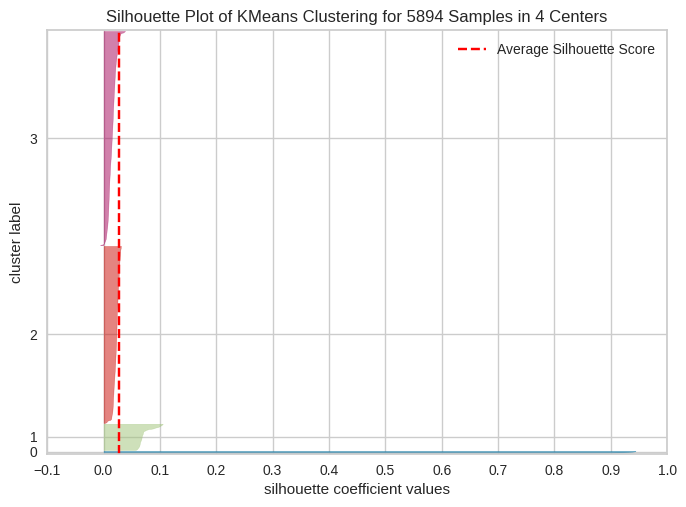

In [17]:
plot_model(kmeans, plot = 'silhouette')

In [18]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [19]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Country_Egypt,Country_Senegal,Country_Vietnam,Country_Costa Rica,Country_Guinea,Country_Guinea-Bissau,Country_Lithuania,Country_Israel,Country_Eritrea,Country_Chad,...,Country_Ethiopia,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male,Cluster
0,-0.073884,-0.072714,-0.073884,-0.072714,-0.072714,-0.075036,-0.073884,-0.071526,-0.073884,-0.073884,...,-0.072714,-1.155119,-0.994755,-0.913155,-0.793438,-0.780121,-0.131329,-0.138429,-0.128948,Cluster 2
1,-0.073884,-0.072714,-0.073884,-0.072714,-0.072714,-0.075036,-0.073884,-0.071526,-0.073884,-0.073884,...,-0.072714,-0.525782,-1.030973,-0.880452,-0.754817,-0.780121,-0.130267,-0.138234,-0.127709,Cluster 2
2,-0.073884,-0.072714,-0.073884,-0.072714,-0.072714,-0.075036,-0.073884,-0.071526,-0.073884,-0.073884,...,-0.072714,-0.316003,-1.067192,-0.858650,-0.723920,-0.791339,-0.127885,-0.137083,-0.125082,Cluster 2
3,-0.073884,-0.072714,-0.073884,-0.072714,-0.072714,-0.075036,-0.073884,-0.071526,-0.073884,-0.073884,...,-0.072714,0.208444,-1.154116,-0.793244,-0.631231,-0.768902,-0.123588,-0.134654,-0.120418,Cluster 2
4,-0.073884,-0.072714,-0.073884,-0.072714,-0.072714,-0.075036,-0.073884,-0.071526,-0.073884,-0.073884,...,-0.072714,0.837781,-0.067559,-0.095581,0.357462,-0.712810,-0.134430,-0.141166,-0.132106,Cluster 3


In [20]:
save_model(kmeans,'Final KMeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Data.Daily cigarettes',
                                              'Data.Percentage.Male',
                                              'Data.Percentage.Female',
                                              'Data.Percentage.Total',
                                              'Data.Smokers.Total',
                                              'Data.Smokers.Female',
                                              'Data.Smokers.Male'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Country'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Country'],
                                     transformer=OneHotEncoder(cols=['

In [21]:

saved_kmeans = load_model('Final KMeans Model')

Transformation Pipeline and Model Successfully Loaded


In [22]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [23]:
new_prediction.head()


,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male,Cluster
0,Afghanistan,1985,6.1,10.6,18.700001,2.2,634732,65946,568786,Cluster 2
1,Afghanistan,1991,5.6,10.9,19.200001,2.2,707278,68289,638989,Cluster 2
2,Afghanistan,1993,5.1,11.1,19.600000,2.1,869965,82119,787847,Cluster 2
3,Afghanistan,1998,3.9,11.7,20.799999,2.3,1163473,111314,1052159,Cluster 2
4,Albania,2004,18.9,18.1,33.599998,2.8,422860,33057,389803,Cluster 3
